# Simple Neural Network Examples
**Make sure you have activated the correct python envorinment**

+ Using keras API and MNIST data
+ Using graphviz for visualization of the network

### Graphviz installation
1. Download and install from [graphviz site](https://graphviz.gitlab.io/download)
2. Put the executable on the system path
3. Install the pydot python package using command  
   `conda install -c conda-forge pydot`

### Packages

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
np.random.seed(42)

from keras.datasets import mnist
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Sequential, Model 
from keras.layers import Input, Dense, Activation

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Using TensorFlow backend.


## Classification

### Data

MNIST is a dataset of 60,000 28x28 grayscale images of handwritten digits, along with a test set of 10,000 images.

Load the MNIST data using keras. The first time the data are downloaded and cached.  
Subsequent times the data are loaded from the cache.

True values: [7 3 2]


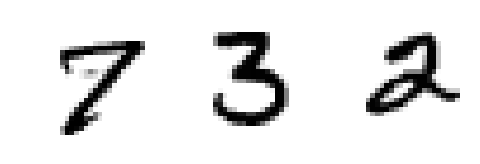

In [2]:
# load the date and split into training/testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# plot a few digits and print the true values
idigits = [53643, 4543, 5]

fig = plt.figure(figsize=(8, 4))
for i in range(len(idigits)):
    ax = fig.add_subplot(1, len(idigits), i + 1)
    ax.imshow(x_train[idigits[i]], cmap = plt.cm.binary, interpolation="nearest")
    ax.axis("off")
print('True values: {}'.format(y_train[idigits]))

### Reshape, cast, normalize inputs
* Reshape the data: 28x28 -> 784  
* Cast the values int8 -> float32

In [3]:
n_classes = 10
n_train = len(x_train)  # 60000
n_test = len(x_test)  # 60000
input_dim = 28 * 28

x_train = x_train.reshape(n_train, input_dim)
x_train = x_train.astype(np.float32)
x_test = x_test.reshape(n_test, input_dim)
x_test = x_test.astype(np.float32)

x_train /= 255
x_test /= 255

### Convert the target values vector to binary class matrix
y_train is a vector of size 60,000.  
It gets mapped to a 60,000 x 10 matrix of 0s and 1s.

In [4]:
print("Targets before: \n{}".format(y_train[:5]))
ybm_train = to_categorical(y_train, n_classes)
ybm_test = to_categorical(y_test, n_classes)
print("Targets after: \n{}".format(ybm_train[:5]))

Targets before: 
[5 0 4 1 9]
Targets after: 
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


### Construct the model
This is a shallow, dense network.  
We use one output layer with softmax activation.  
Softmax is also used in multi-class logistic regression.

In [5]:
nn1 = Sequential()
nn1.add(Dense(n_classes, input_dim=input_dim, activation='softmax'))
nn1.summary()
plot_model(nn1, show_shapes = True, to_file='nn1.png')

# the number of parameters is: n_classes x (input_dim + 1)
# each node has its own bias (therefore +1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


### Compile and fit the model

In [6]:
nn1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 100
n_epochs = 20
nn1_hist = nn1.fit(x_train, ybm_train, batch_size=batch_size, epochs=n_epochs, verbose=0)
val_score = nn1.evaluate(x_test, ybm_test, verbose=0)

print('Single-layer DNN')
print('------------------------')
print('Test loss score: {0:.4f}'.format(val_score[0]))
print('Test accuracy:   {0:.4f}'.format(val_score[1]))

Single-layer DNN
------------------------
Test loss score: 0.3232
Test accuracy:   0.9112


## Using a deeper network 

Two hidden layers, with 3\*n_classes and 2\*n_classes units.  
The final output layer has n_classes units.  
We build the model using the functional API

In [7]:
# construct

inputs = Input(shape=(input_dim,), name='inputs')
x = Dense(3*n_classes, input_dim=input_dim, activation='relu', name='hidden_1')(inputs)
x = Dense(2*n_classes, input_dim=input_dim, activation='relu', name='hidden_2')(x)
outputs = Dense(n_classes, activation='softmax', name='output')(x)

nn3 = Model(inputs=inputs, outputs=outputs)
nn3.summary()
plot_model(nn3, show_shapes = True, to_file='nn3.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 784)               0         
_________________________________________________________________
hidden_1 (Dense)             (None, 30)                23550     
_________________________________________________________________
hidden_2 (Dense)             (None, 20)                620       
_________________________________________________________________
output (Dense)               (None, 10)                210       
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________


In [8]:
# compile, fit and evaluate
nn3.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

batch_size3 = 100
n_epochs3 = 20
nn3_hist = nn3.fit(x_train, ybm_train, batch_size=batch_size3, epochs=n_epochs3, verbose=0)
val_score = nn3.evaluate(x_test, ybm_test, verbose=0)

print('3-Layer DNN')
print('------------------------')
print('Test loss score: {0:.4f}'.format(val_score[0]))
print('Test accuracy:   {0:.4f}'.format(val_score[1]))


3-Layer DNN
------------------------
Test loss score: 0.1844
Test accuracy:   0.9457


### Some predictions

In [9]:
nn3_pred = nn3.predict(x_test[:20])
nn3_ypred = np.argmax(nn3_pred, axis=1)

print('3-layer DNN predictions and true values')
display(nn3_ypred.tolist())
display(y_test[:20].tolist())

3-layer DNN predictions and true values


[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4]

## Logistic Regression 

We fit a multiclass logistic regression model

In [10]:
lgm = LogisticRegression(C=1e-5, multi_class='multinomial', solver='lbfgs', max_iter=1000)
print(lgm)

LogisticRegression(C=1e-05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)


In [11]:
lgm.fit(x_train,  y_train)

LogisticRegression(C=1e-05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
y_pred = lgm.predict(x_test)
lg_acc = accuracy_score(y_test, y_pred)
print('Logistic Regression')
print('------------------------')
print('Test accuracy:   {0:.4f}'.format(lg_acc))

Logistic Regression
------------------------
Test accuracy:   0.7482


### Some predictions

In [13]:
print('Logistic regression predictions and true values')
print(y_pred[:20].tolist())
print(y_test[:20].tolist())

Logistic regression predictions and true values
[7, 2, 1, 0, 4, 1, 4, 9, 6, 7, 0, 0, 9, 0, 1, 3, 9, 7, 3, 4]
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4]
